## Ques 1 Consider the entire Yale Faces datase

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore") 

In [2]:
my_dir = os.getcwd() 
zip_folder = os.path.join(my_dir,"yalefaces.zip")
print("Path to the zipped folder is {}".format(zip_folder))
with ZipFile(zip_folder, 'r') as zip: 
    zip.extractall()

Path to the zipped folder is /home/ayush/Desktop/Assign/Hashing Assign 5/yalefaces.zip


['subject08.centerlight', 'subject08.normal', 'subject15.normal', 'subject01.happy', 'subject13.sleepy', 'subject15.noglasses', 'subject02.happy', 'subject05.normal', 'subject02.normal', 'subject14.glasses', 'subject01.leftlight', 'subject14.happy', 'subject13.centerlight', 'subject09.sad', 'subject14.rightlight', 'subject14.normal', 'subject13.leftlight', 'subject06.sleepy', 'subject10.rightlight', 'Readme.txt', 'subject08.noglasses', 'subject08.happy', 'subject11.rightlight', 'subject02.sad', 'subject01.sad', 'subject07.surprised', 'subject09.glasses', 'subject12.surprised', 'subject07.noglasses', 'subject07.sad', 'subject08.surprised', 'subject10.wink', 'subject11.centerlight', 'subject02.noglasses', 'subject06.sad', 'subject02.wink', 'subject15.happy', 'subject05.wink', 'subject08.leftlight', 'subject09.normal', 'subject07.glasses', 'subject04.glasses', 'subject12.happy', 'subject04.leftlight', 'subject02.leftlight', 'subject12.glasses', 'subject15.sad', 'subject11.wink', 'subject0

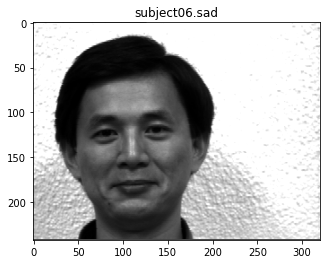

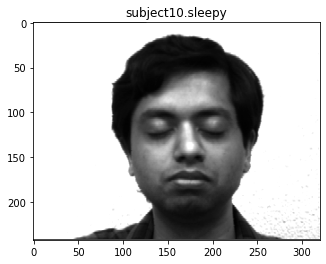

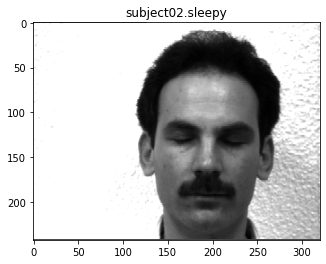

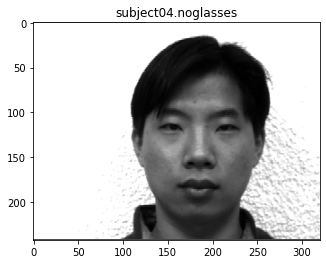

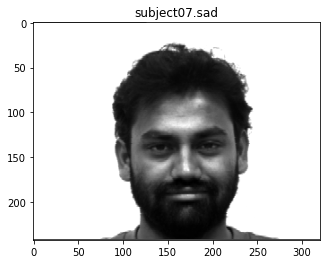

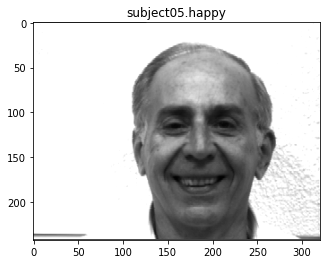

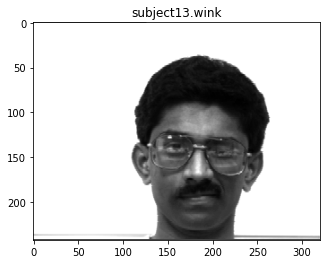

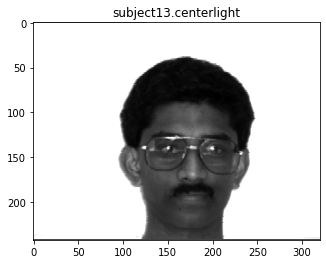

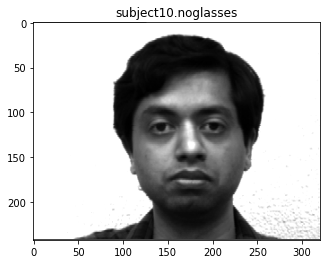

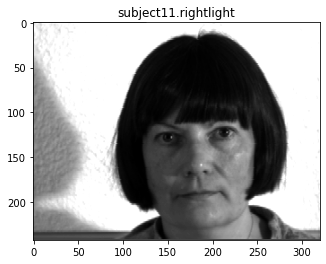

In [3]:
data_folder = os.path.join(my_dir,"yalefaces")
file_list = os.listdir(data_folder)
print(file_list)
sample_images = sample(file_list,10) 
for img_name in sample_images:
    image_path = os.path.join(data_folder,img_name)
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap="gray")
    plt.title(img_name)
    plt.show()

## Ques 2 . Obtain the transformation matrix Q and mean vector μ by performing Principal Component analysis on the dataset

In [4]:
train_folder_path = os.path.join(my_dir,"Faces_Train")
test_folder_path = os.path.join(my_dir,"Faces_Test")

## Delete the folders if they exist already
if os.path.exists(train_folder_path):
    shutil.rmtree(train_folder_path)

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)

os.mkdir(train_folder_path)  ## Creates a new directory
os.mkdir(test_folder_path) ## Creates a new directory

idx_list = [str(i).zfill(2) for i in range(1,16,1)] 
file_name_list = [[] for i in range(15)]

for i in range(len(idx_list)):
    for fname in file_list:
        if fname.startswith("subject"+idx_list[i]):
            file_name_list[i].append(os.path.join(data_folder,fname))
            
for i in range(len(idx_list)):
    ls = file_name_list[i]  
    test_idx = np.random.choice(11)  
    test_file = ls[test_idx]
    shutil.copy(test_file,test_folder_path)
    
    ls.remove(ls[test_idx])
    
    for train_file in ls:
        shutil.copy(train_file,train_folder_path)
train_files_list = os.listdir(train_folder_path)
train_ls = []
for file in train_files_list:
    img_file = os.path.join(train_folder_path,file)
    arr = mpimg.imread(img_file)
    arr = arr.reshape(1,arr.shape[0]*arr.shape[1]) ## Convert to a 1D matrix
    train_ls.append(np.ravel(arr)) ## Before appending, convert the 1D martix to a 1d array using np.ravel 
train_mat = np.matrix(train_ls)
mean_img = np.mean(train_mat,axis=0)
cov = np.cov(train_mat)
eig_val,eig_vec = np.linalg.eig(cov)

eigen_vec_ls = []
#eig1 = train_mat.T@eig_vec[:,0]
for i in range(eig_vec.shape[1]):
    eig1 = train_mat.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))


In [5]:
#print(train_files_list)
#print(arr.shape)
# print(train_mat.shape)
# print(eig_vec)
#print(eig1.shape)
#print(eigen_vec_ls)

In [6]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 28


In [7]:
Q = np.matrix(principal_eig_vec)
mu=mean_img
print(Q)
print(mu)

[[ 2.14351068e-03+0.j  2.15264174e-03+0.j  2.16301196e-03+0.j ...
   1.16288019e-03+0.j  1.16288019e-03+0.j  1.16288019e-03+0.j]
 [-7.27820062e-04+0.j -5.98634181e-04+0.j -5.30218447e-04+0.j ...
  -5.01321986e-04+0.j -5.01321986e-04+0.j -5.01321986e-04+0.j]
 [-9.77017641e-04+0.j -8.49380477e-04+0.j -9.95312248e-04+0.j ...
  -1.47006883e-03+0.j -1.47006883e-03+0.j -1.47006883e-03+0.j]
 ...
 [-7.43098416e-05+0.j -8.77862425e-04+0.j  6.48845984e-04+0.j ...
   2.23339060e-03+0.j  2.23339060e-03+0.j  2.23339060e-03+0.j]
 [ 4.86088327e-03+0.j  5.84220714e-03+0.j  4.41244389e-03+0.j ...
   3.00688709e-04+0.j  3.00688709e-04+0.j  3.00688709e-04+0.j]
 [-4.00179856e-03+0.j -3.11680844e-03+0.j -2.08760109e-03+0.j ...
   9.38684018e-04+0.j  9.38684018e-04+0.j  9.38684018e-04+0.j]]
[[123.68211921 123.66225166 124.01986755 ...  68.          68.
   68.        ]]


## Ques 3 Obtain the feature vector for every training set by using the transformation v = QT (x − μ).

In [8]:
test_files = os.listdir(test_folder_path)
feat_vec_ls = []
for file in test_files:
    img_file = os.path.join(test_folder_path,file)
    test_img = mpimg.imread(img_file)
    test_img = test_img.reshape(arr.shape[0]*arr.shape[1],1)
    test_img = test_img - mean_img.T
    feat_vec = np.linalg.pinv(Q).T@test_img
    feat_vec_ls.append(np.ravel(feat_vec))
print(np.linalg.pinv(Q).shape,test_img.shape)

(77760, 28) (77760, 1)


## Ques 4 Generate around 50 random vectors of dimension n_dim, where n_dim is the number of dimensions in v.

In [9]:
vec_len=len(feat_vec_ls[0])


In [10]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector
hash_vec=genRandomHashVectors(50, vec_len)
hash_vec

[array([-2.19632139e-01, -2.12130444e-01,  1.75859291e-04, -1.74405073e-01,
        -2.03828314e-01,  2.61118065e-01,  2.11141480e-01,  3.80653381e-02,
        -6.52251508e-02, -1.33828852e-01,  2.25842053e-01, -2.81354119e-01,
        -8.78008919e-02, -2.01799456e-01,  2.79205932e-01, -1.20350644e-02,
        -1.66730996e-01, -2.16858232e-02,  4.95679728e-02,  6.68193426e-02,
         2.15878600e-01,  2.80742806e-01,  1.75059681e-01, -2.58118048e-01,
        -2.68363519e-01, -1.28807035e-01, -1.98052757e-01,  2.36659048e-01]),
 array([ 0.27349217, -0.28133759, -0.22822936, -0.20248085, -0.10583562,
         0.14507452,  0.31026836, -0.04612084, -0.04206021,  0.12416523,
        -0.19063887, -0.09490032, -0.08511394,  0.18878211, -0.14720871,
         0.12598998,  0.04392961,  0.28940156,  0.24122523,  0.28749073,
         0.06721304, -0.24727546, -0.05297729, -0.26332899,  0.10094897,
        -0.16720076, -0.1760345 , -0.2142204 ]),
 array([ 0.01203313, -0.21443768,  0.16529819,  0.25

## Ques 5 Generate 50-bit hash representation of each of the feature vectors.

In [11]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code
localSensitiveHashing(hash_vec ,feat_vec_ls[1])

['1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1']

## Ques 6 Calculate the L1-norm distance between the hash representation of a par- ticular feature vector with the hash representation of other feature vectors and sort the vectors based on the distance values.

In [12]:
n= np.random.randint(1,vec_len)
list_1=[]
for i in range (len(feat_vec_ls)):
    list_1.append(np.linalg.norm((feat_vec_ls[i]- feat_vec_ls[n]),ord=1))

In [13]:
list_1.sort()
print(list_1)

[0.0, 42515.50652077741, 46539.27730565303, 60319.816917062955, 61406.030407984676, 61788.82052137821, 69716.17173796121, 70914.30183802264, 71050.49050235777, 74742.90410232845, 76553.33459729195, 77814.32085383548, 79003.16809857143, 80511.78098527856, 85537.4169898033]
